**Trends of EV Market with respect to Sales**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
df = pd.read_excel('/content/Ev Sales.xlsx')

In [69]:
df.shape

(74, 6)

In [70]:
df.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


In [71]:
df.describe()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
count,74,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2020-04-16 04:12:58.378378496,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
min,2017-04-01 00:00:00,85.000000,668.000000,3.000000,0.000000,958.000000
25%,2018-10-08 18:00:00,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,2020-04-16 00:00:00,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,2021-10-24 06:00:00,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,2023-05-01 00:00:00,105154.000000,45225.000000,8852.000000,331.000000,157788.000000
std,NaN,25846.636971,11002.517635,1841.195763,79.696672,38251.453387


In [72]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [73]:
df.isnull().sum()

,0
YEAR,0
2 W,0
3 W,0
4 W,0
BUS,0
TOTAL,0


In [74]:
two_wheelers_sales=df['2 W'].sum()
two_wheelers_sales

np.int64(1253466)

In [75]:
three_wheelers_sales=df['3 W'].sum()
three_wheelers_sales

np.int64(1099000)

In [76]:
four_wheelers_sales = df['4 W'].sum()
four_wheelers_sales

np.int64(94170)

In [77]:
bus_sales=df['BUS'].sum()
bus_sales

np.int64(6091)

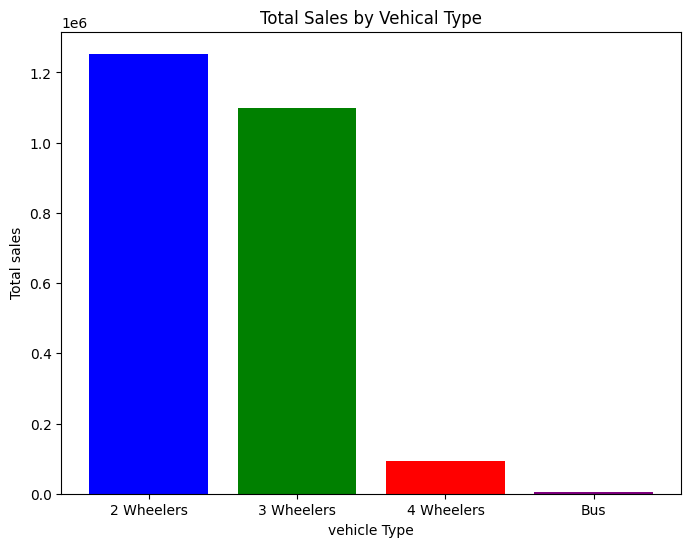

In [78]:
sales_data = {
    '2 Wheelers' : two_wheelers_sales,
    '3 Wheelers' : three_wheelers_sales,
    '4 Wheelers' : four_wheelers_sales,
    'Bus':bus_sales
}
vehicle_types = list(sales_data.keys())
total_sales = list(sales_data.values())

plt.figure(figsize=(8,6))
plt.bar(vehicle_types, total_sales, color=['blue','green','red','purple'])
plt.xlabel('vehicle Type')
plt.ylabel('Total sales')
plt.title('Total Sales by Vehical Type')
plt.show()

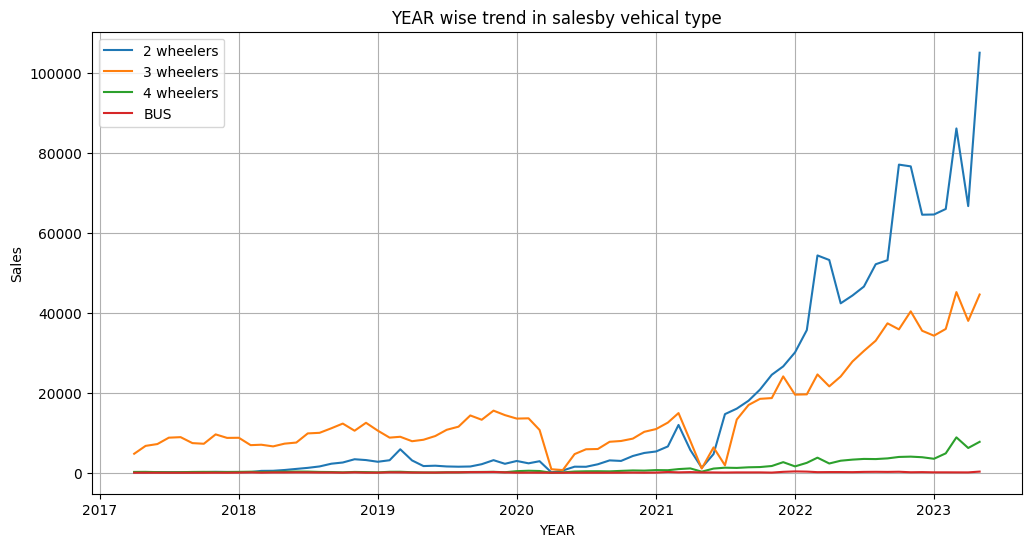

In [79]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'],df['2 W'],linestyle='-',label='2 wheelers')
plt.plot(df['YEAR'],df['3 W'],linestyle='-',label='3 wheelers')
plt.plot(df['YEAR'],df['4 W'],linestyle='-',label='4 wheelers')
plt.plot(df['YEAR'],df['BUS'],linestyle='-',label='BUS')

plt.xlabel('YEAR')
plt.ylabel('Sales')
plt.title('YEAR wise trend in salesby vehical type')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
df

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141
...,...,...,...,...,...,...
69,2023-01-01,64649,34308,3490,98,102545
70,2023-02-01,66033,35995,4850,99,106977
71,2023-03-01,86194,45225,8852,89,140360
72,2023-04-01,66755,38016,6193,84,111048


In [81]:
df_grouped = df.groupby(df['YEAR'].dt.year)[['2 W','3 W','4 W','BUS','TOTAL']].sum()

In [82]:
df_grouped

,2 W,3 W,4 W,BUS,TOTAL
YEAR,,,,,
2017,1211,69307,1591,14,72123
2018,17062,110375,2500,680,130617
2019,30389,133489,1749,1093,166720
2020,29112,90361,4323,88,123884
2021,156182,147180,14142,1180,318684
2022,630725,350129,38744,2383,1021981
2023,388785,198159,31121,653,618718


In [83]:
x= np.arange(len(df_grouped.index))
bar_width = 0.2

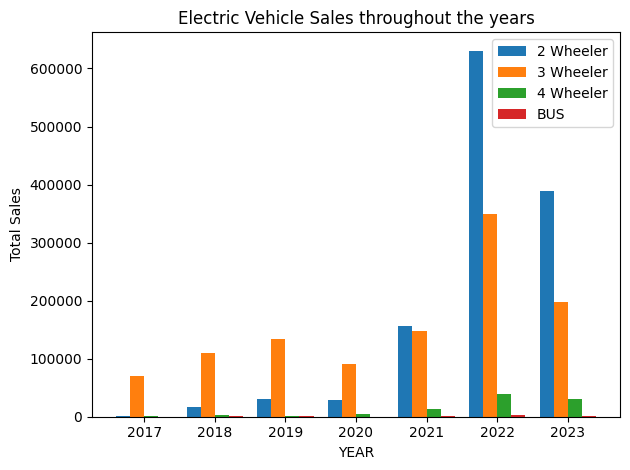

In [84]:
categories = ['2 W','3 W','4 W','BUS']
labels = ['2 Wheeler','3 Wheeler','4 Wheeler','BUS']
#Plot grouped bars using a loop
for i, (cat, label) in enumerate(zip(categories, labels)):
  plt.bar(x + i*bar_width, df_grouped[cat], width=bar_width, label=label)

#Axis labels & title
plt.xlabel('YEAR')
plt.ylabel('Total Sales')
plt.title('Electric Vehicle Sales throughout the years')
plt.xticks(x + bar_width *(len(categories) - 1) / 2, df_grouped.index)

plt.legend()
plt.tight_layout()
plt.show()

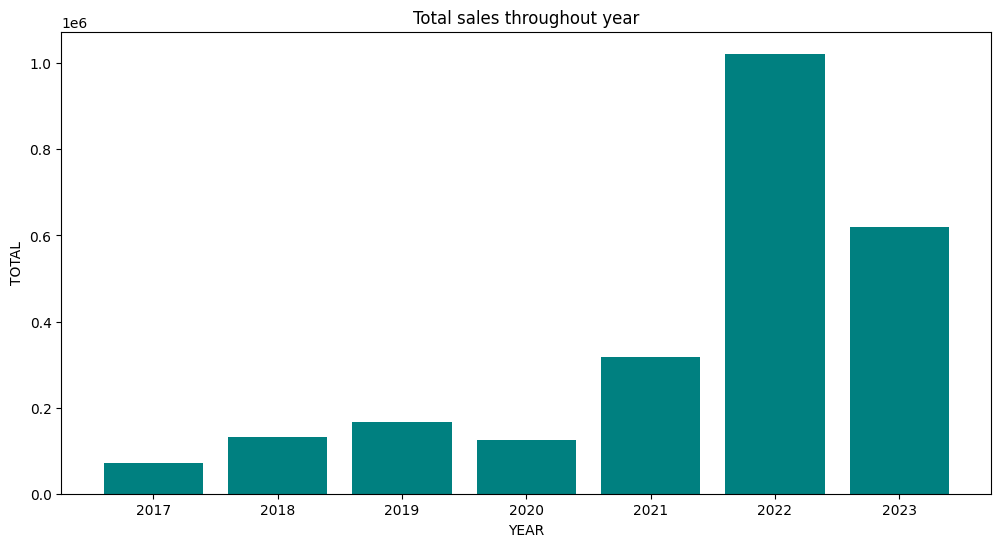

In [85]:
plt.figure(figsize=(12,6))
plt.bar(df_grouped.index, df_grouped['TOTAL'], color = 'teal')
plt.xlabel('YEAR')
plt.ylabel('TOTAL')
plt.title('Total sales throughout year')
plt.show()

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [87]:
# scaling the data
X = df[['2 W','3 W','4 W', 'BUS']]

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Clustering**

In [89]:
## Elbow Method and Silhouette Score: Find optimal number of clusters

inertia = []
silhouette_scores_list = [] # Renamed the list to avoid conflict with the function
# Check for 2 to 9 clusters
K_range = range(2, 10)

for k in K_range:
  print(f"Checking for k = {k}")
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
  kmeans.fit(X_scaled)
  # Inertia for Elbow Method
  inertia.append(kmeans.inertia_)


Checking for k = 2
Checking for k = 3
Checking for k = 4
Checking for k = 5
Checking for k = 6
Checking for k = 7
Checking for k = 8
Checking for k = 9


In [90]:

  # Compute Silhouette score
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  silhouette_scores_list.append(silhouette_avg)

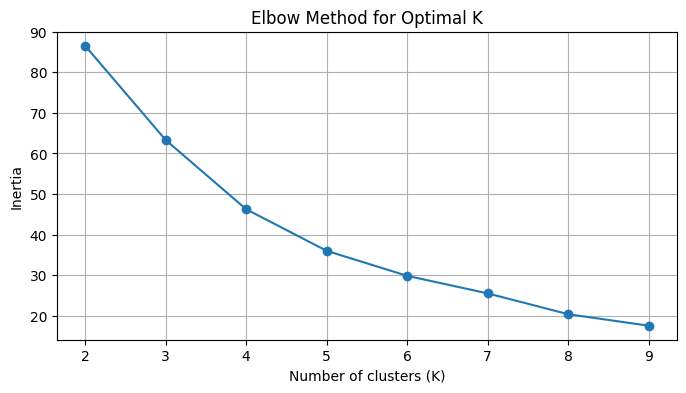

In [91]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [92]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [93]:
print(df[['YEAR', 'Cluster']])

         YEAR  Cluster
0  2017-04-01        2
1  2017-05-01        2
2  2017-06-01        2
3  2017-07-01        2
4  2017-08-01        2
..        ...      ...
69 2023-01-01        1
70 2023-02-01        1
71 2023-03-01        1
72 2023-04-01        1
73 2023-05-01        1

[74 rows x 2 columns]


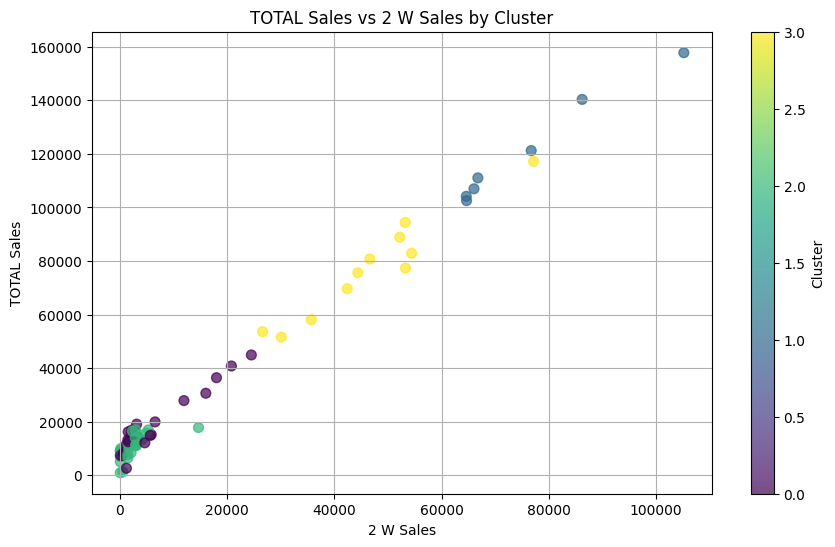

In [94]:
# Scatter plot of TOTAL sales vs 2 W sales, colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(df['2 W'], df['TOTAL'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('2 W Sales')
plt.ylabel('TOTAL Sales')
plt.title('TOTAL Sales vs 2 W Sales by Cluster')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

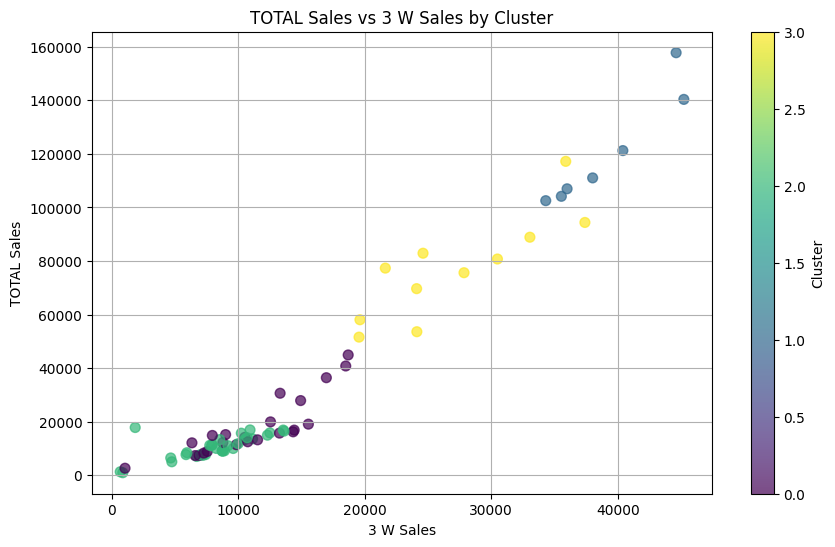

In [95]:
# Scatter plot of TOTAL sales vs 3 W sales, colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(df['3 W'], df['TOTAL'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('3 W Sales')
plt.ylabel('TOTAL Sales')
plt.title('TOTAL Sales vs 3 W Sales by Cluster')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

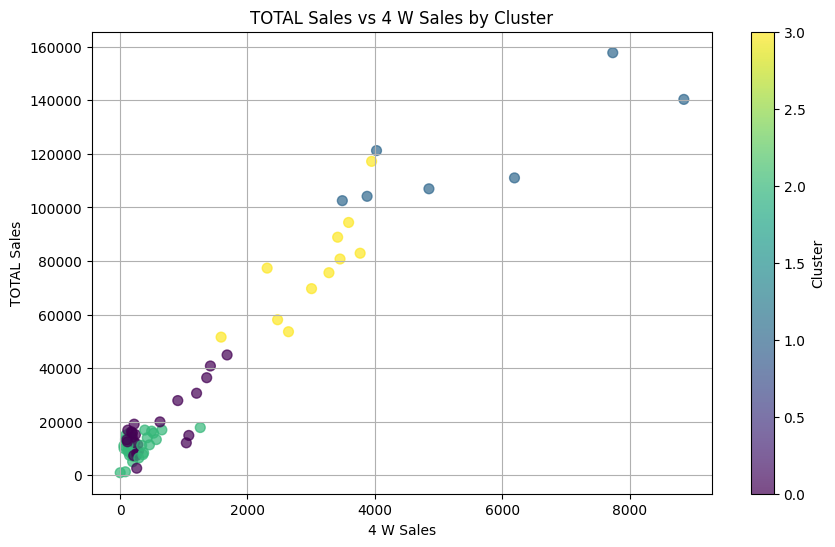

In [96]:
# Scatter plot of TOTAL sales vs 4 W sales, colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(df['4 W'], df['TOTAL'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('4 W Sales')
plt.ylabel('TOTAL Sales')
plt.title('TOTAL Sales vs 4 W Sales by Cluster')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

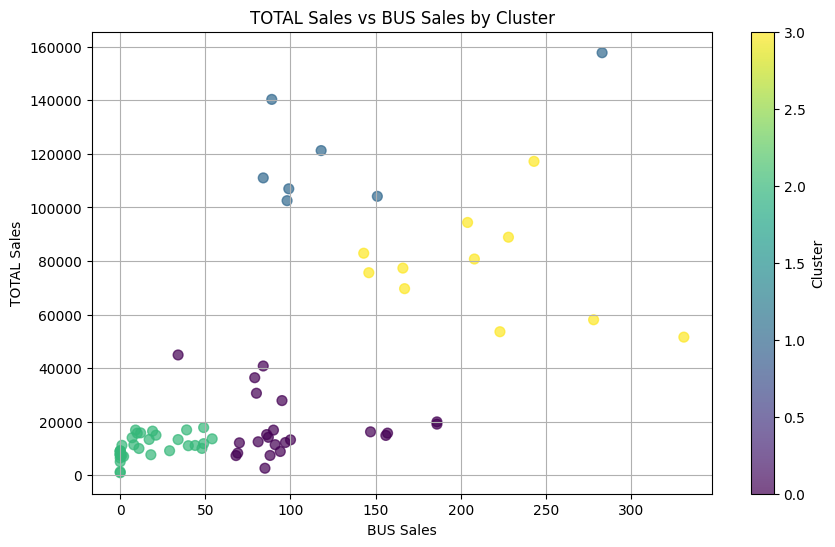

In [97]:
# Scatter plot of TOTAL sales vs 4 W sales, colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(df['BUS'], df['TOTAL'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('BUS Sales')
plt.ylabel('TOTAL Sales')
plt.title('TOTAL Sales vs BUS Sales by Cluster')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**BOX Plot**

/tmp/ipython-input-1176293851.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X, labels = ['2 W','3 W','4 W', 'BUS'])


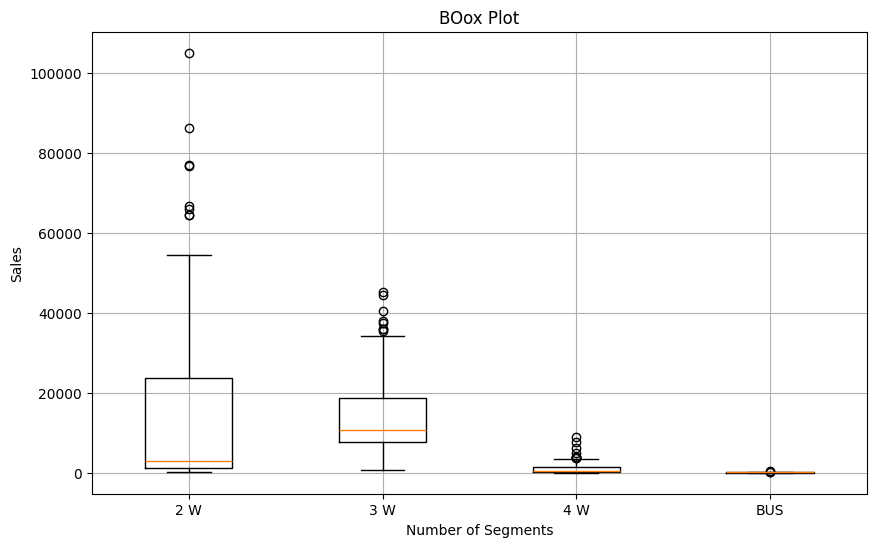

In [98]:
X = [df['2 W'], df['3 W'], df['4 W'], df['BUS']]
plt.figure(figsize=(10,6))
plt.boxplot(X, labels = ['2 W','3 W','4 W', 'BUS'])
#set labels and title
plt.xlabel('Number of Segments')
plt.ylabel('Sales')
plt.title('BOox Plot')
# show the plot
plt.grid(True)
plt.show()

**Conclusion from the Analysis:**

Based on the data loading, initial exploration, visualization, and K-Means clustering performed, we can draw the following conclusions:

1.  **Dominance of 2-Wheelers and 3-Wheelers:** The initial bar chart of total sales by vehicle type clearly shows that 2-wheelers and 3-wheelers constitute the vast majority of electric vehicle sales in this dataset. 4-wheelers and buses represent a much smaller proportion of the total sales.

2.  **Overall Growth Trend:** The line plot of year-wise sales trends indicates a significant upward trend in total electric vehicle sales over the years covered in the dataset (2017-2023). While there might be some fluctuations, the overall trajectory shows increasing adoption of electric vehicles.

3.  **Accelerated Growth in Recent Years:** The yearly grouped bar chart and the total sales bar chart highlight a particularly strong acceleration in sales in the most recent years (2021, 2022, and 2023). This suggests a potential inflection point in the adoption curve.

4.  **Differing Growth Rates by Vehicle Type:** While all vehicle types show growth, the line plot suggests that the growth rates for 2-wheelers and 3-wheelers have been particularly steep in recent years compared to 4-wheelers and buses.

5.  **Clustering Reveals Distinct Sales Patterns:** The K-Means clustering, visualized through scatter plots against total sales, appears to group the data points based on their overall sales volume and potentially the mix of vehicle types. The clusters likely represent different phases or levels of market maturity or adoption. For example, one cluster might represent early adoption with low sales volumes across all categories, while another cluster might represent periods of high growth driven primarily by 2-wheeler and 3-wheeler sales.



**Analysis of behavioural pattern **

In [99]:
import seaborn as sns

In [100]:
df_2 = pd.read_csv('/content/behavioural_segment_data.csv')


In [101]:
df_2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [102]:
df_2.shape

(99, 8)

In [103]:
df_2.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [104]:
df_2.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [105]:
df_2.isnull().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
Total Salary,0
Price,0


In [106]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


Distribution of Numerical Variables

In [107]:
num_cols = ["Age","No of Dependents" ,"Total Salary","Price"]

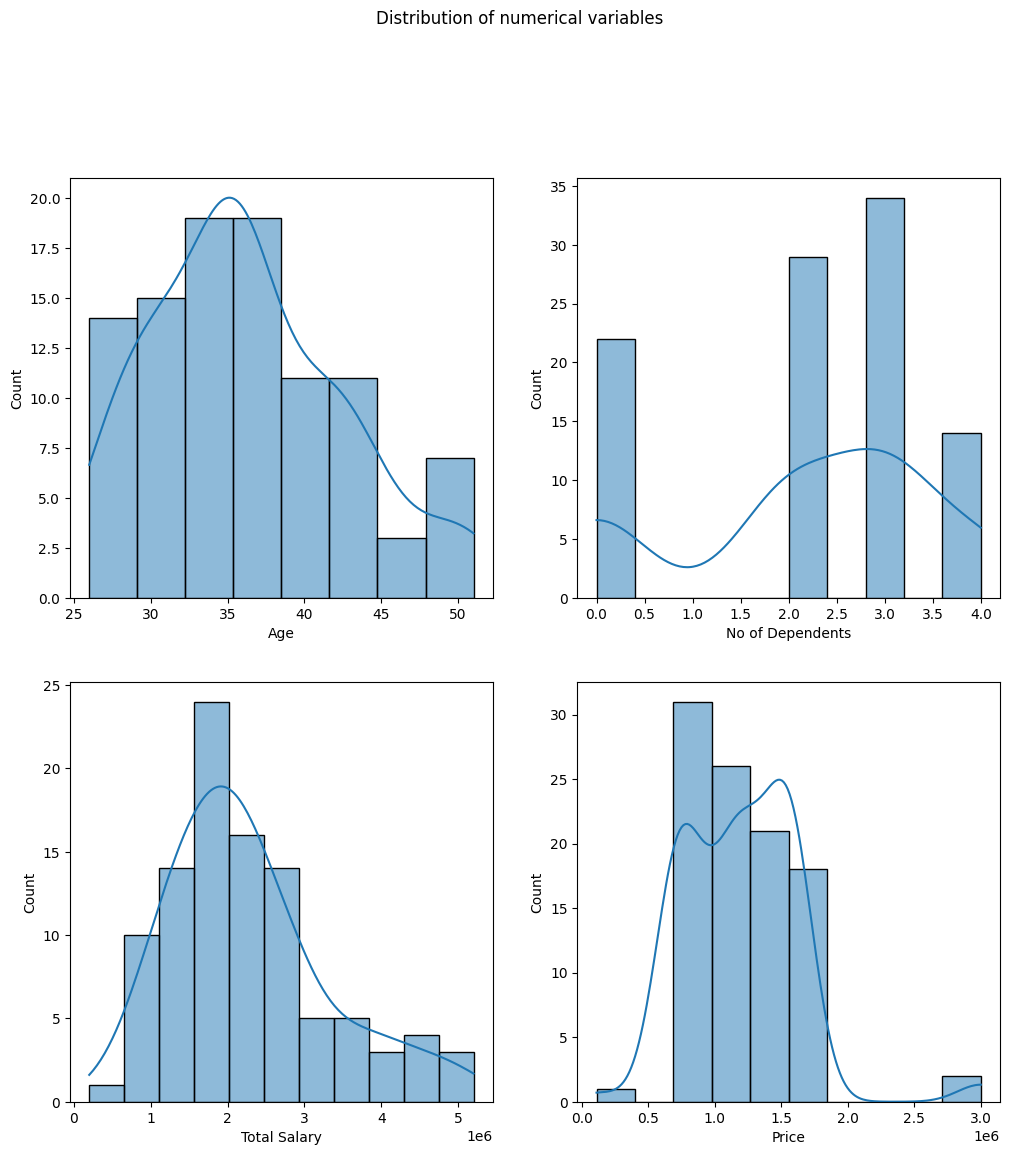

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Age","No of Dependents" ,"Total Salary","Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten() # Flatten the 2x2 array of axes into a 1D array

for i in range(len(num_cols)):
  sns.histplot(data = df_2 , x=num_cols[i], ax=axes[i], kde=True) # Added kde=True for density curve

plt.suptitle("Distribution of numerical variables", y=1.02) # Use suptitle for the main title and adjust y position
plt.show()

In [134]:
avg_age = df_2['Age'].mean()
print("Average Age:", round(avg_age))

Average Age: 36


In [135]:
avg_age_range = pd.cut([avg_age], bins=bins, labels=labels)[0]
print("Average Age falls in range:", avg_age_range)

Average Age falls in range: 35-44


In [139]:
avg_salary = df_2['Total Salary'].mean()
print("Average Salary :", round(avg_salary))


Average Salary : 2270707


**Distribution of Profession Variable**

In [109]:
df_2['Profession'].unique()

array(['Salaried', 'Business'], dtype=object)

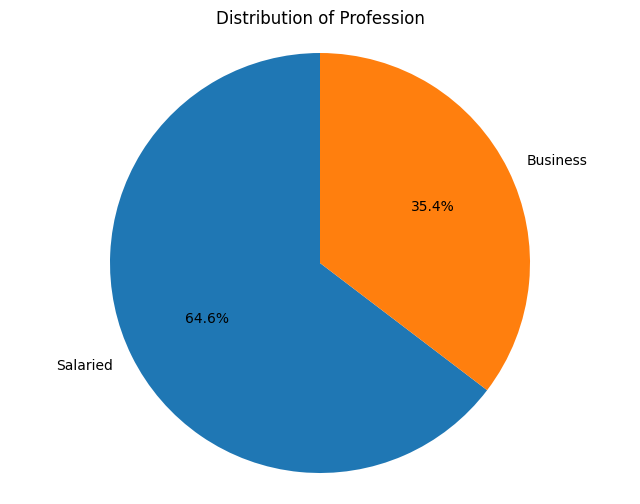

In [110]:
# Pie chart for Profession variable
profession_counts = df_2['Profession'].value_counts()

plt.figure(figsize= (8,6))
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profession')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

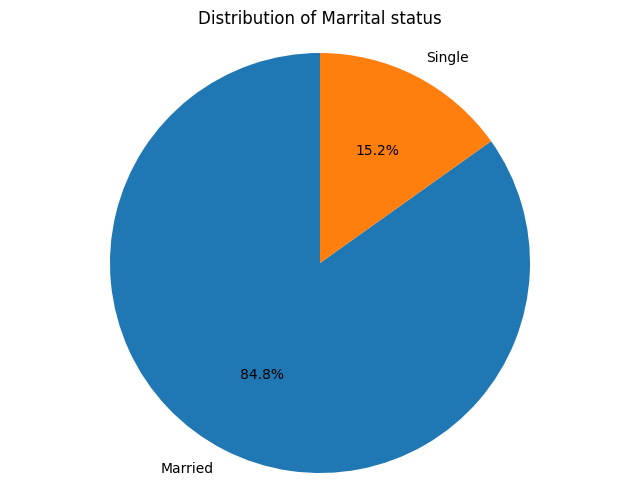

In [111]:
# Pie chart for Marrital Status
Marrital_Status_counts = df_2['Marrital Status'].value_counts()

plt.figure(figsize = (8,6))
plt.pie(Marrital_Status_counts, labels = Marrital_Status_counts.index, autopct ='%1.1f%%' , startangle = 90)
plt.title('Distribution of Marrital status')
plt.axis('equal')
plt.show()

**Distribution of Education**

Text(0, 0.5, 'Count')

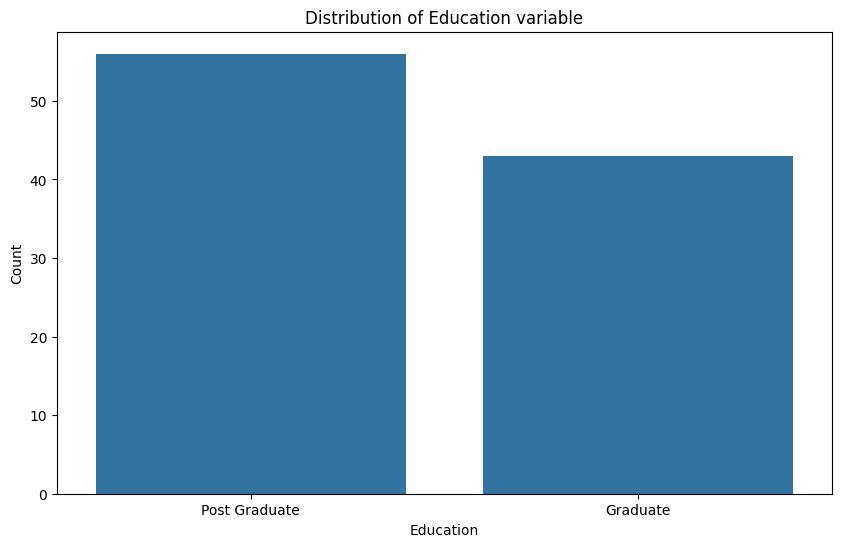

In [112]:
# Create a bar chart
plt.figure(figsize = (10, 6))
sns.barplot(x=df_2["Education"].value_counts().index, y=df_2["Education"].value_counts())

# Add a title and labels to the axes
plt.title("Distribution of Education variable")
plt.xlabel("Education")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

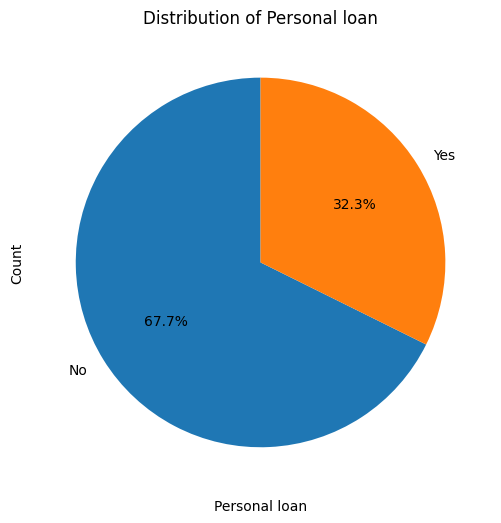

In [113]:
# Pie Chart for Personal loan
Personal_loan_counts = df_2['Personal loan'].value_counts()

plt.figure(figsize = (8,6))
plt.pie(Personal_loan_counts, labels = Personal_loan_counts.index, autopct ='%1.1f%%' , startangle = 90)
plt.title("Distribution of Personal loan")
plt.xlabel("Personal loan")
plt.ylabel("Count")

**Data Preprocessing**

Dropping Duplicate Data

In [140]:
# Drop duplicate values
df_2.duplicated().sum()


np.int64(0)

In [141]:
df_2.drop_duplicates(inplace=True)

In [148]:
df_2['Personal loan'].unique()

array(['Yes', 'No'], dtype=object)

In [149]:
df_2['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [150]:
df_2['Marrital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [151]:
df_2['Profession'].unique()

array(['Salaried', 'Business'], dtype=object)

**Encoding the Categorical Variables**

In [153]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

#Apply LabelEncoder to each categorical column in DataFrame
df_encoded = df_2.copy()

for column in df_encoded.select_dtypes(include= ['object', 'category']).columns:
  df_encoded[column] = encoder.fit_transform(df_encoded[column])

In [154]:
df_encoded.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,1,1,1,0,1,800000,800000
1,35,1,0,1,2,1,2000000,1000000
2,45,0,0,0,4,1,1800000,1200000
3,41,0,0,1,3,0,2200000,1200000
4,31,1,0,1,2,1,2600000,1600000


In [158]:
encoders = {}
for col in ['Profession', 'Marrital Status', 'Education', 'Personal loan']: # Corrected 'Marital Status' and used correct column names
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_2[col]) # Used df_2 to access original data
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [159]:
print(encoders)


{'Profession': {'Business': np.int64(0), 'Salaried': np.int64(1)}, 'Marrital Status': {'Married': np.int64(0), 'Single': np.int64(1)}, 'Education': {'Graduate': np.int64(0), 'Post Graduate': np.int64(1)}, 'Personal loan': {'No': np.int64(0), 'Yes': np.int64(1)}}


**Feature Scaling**

In [161]:
df_scaled = df_encoded.copy()
scaler = StandardScaler()
scaling_feature = ["Age","Total Salary","Price"]
df_scaled[scaling_feature] = scaler.fit_transform(df_scaled[scaling_feature])

In [162]:
df_scaled[scaling_feature]

,Age,Total Salary,Price
0,-1.498630,-1.406760,-0.904843
1,-0.211304,-0.258937,-0.445579
2,1.397855,-0.450240,0.013685
3,0.754191,-0.067633,0.013685
4,-0.854967,0.314975,0.932213
...,...,...,...
94,-1.498630,0.123671,0.932213
95,2.202434,2.706274,0.932213
96,2.363350,-0.067633,-0.215947
97,2.363350,1.654102,0.702581


**Market Segmentation**

KMeans Clustering

In [163]:
wcss = []
ss = []

#Perform PCA
pca = PCA(2)
pca_encoded = pca.fit_transform(df_scaled)

for i in range(2,12):
  kmean = KMeans(n_clusters=i, n_init='auto', random_state=42)
  kmean.fit(df_scaled)
  wcss.append(kmean.inertia_)

  y = kmean.predict(df_scaled)
  s = silhouette_score(pca_encoded, y , random_state=0)
  ss.append(round(s, 5))

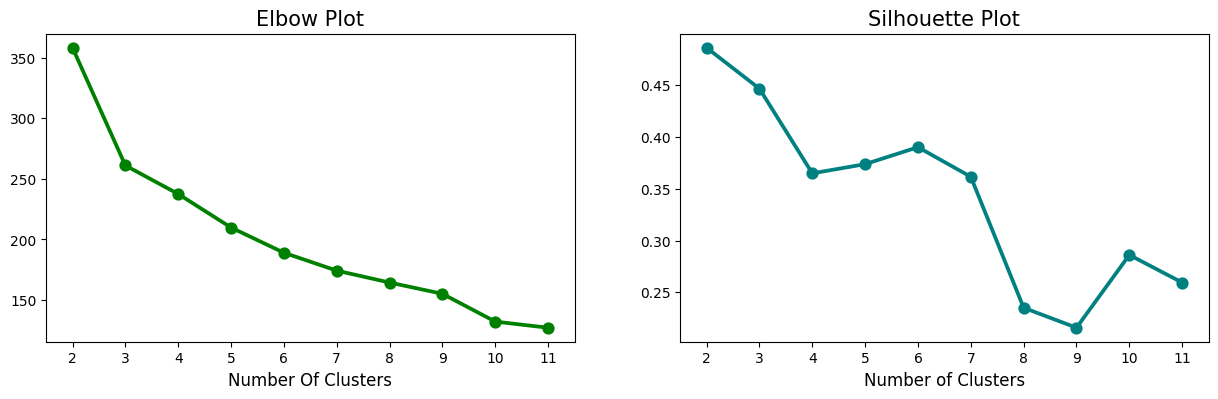

In [167]:
# Identifying optimal value of K for KMeans Clustering
fig, axs = plt.subplots(1,2, figsize=(15, 4))
sns.pointplot( x= list(range(2,12)), y=wcss, color='Green', ax=axs[0])
axs[0].set_title("Elbow Plot" , size=15)
axs[0].set_xlabel("Number Of Clusters", size = 12)

sns.pointplot(x=list(range(2, 12)), y=ss, ax=axs[1], color='Teal')
axs[1].set_title("Silhouette Plot", size = 15)
axs[1].set_xlabel("Number of Clusters", size=12)
plt.show()

In [170]:
# Apply KMeans with 4 clusters and plotting clusters using PCA

Clustering = KMeans(n_clusters=3, random_state=2).fit(df_scaled)
labels = Clustering.labels_
# df['Cluster'] = labels # Remove this line as df has a different number of rows
df_encoded['Cluster'] = labels

# perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

# Transform the cluster centers using the same PCA transformation
centers = pca.transform(Clustering.cluster_centers_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


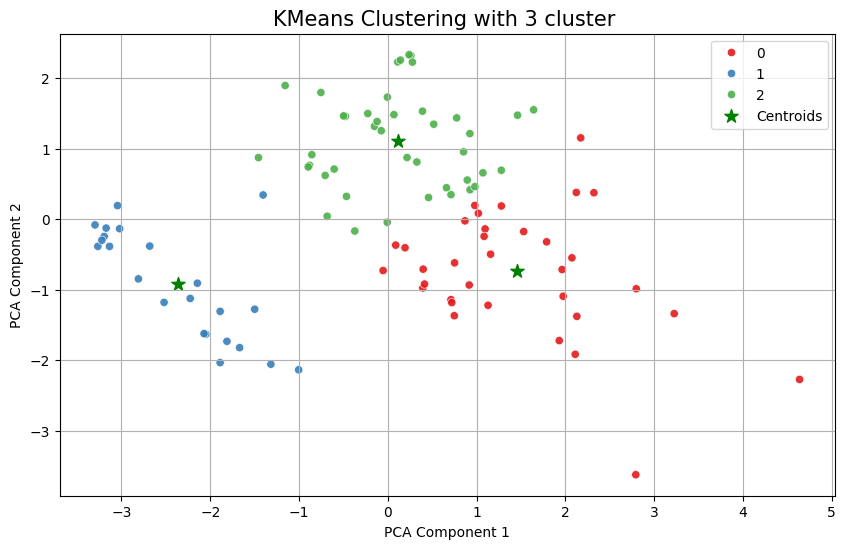

In [173]:
## 2D Scatter PLOT using Seaborn
plt.figure(figsize=(10,6))
sns.scatterplot( x=pca_df[:,0], y=pca_df[:,1], hue=labels, palette = "Set1", legend= 'full', alpha=0.9)
plt.scatter(centers[:, 0], centers[:,1], c='green', s =100, marker = '*', label = 'Centroids')
plt.title("KMeans Clustering with 3 cluster ", size= 15)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [174]:
data_pivot = df_encoded.groupby('Cluster').mean().T
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

/tmp/ipython-input-2133862673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')
/tmp/ipython-input-2133862673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')
/tmp/ipython-input-2133862673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')


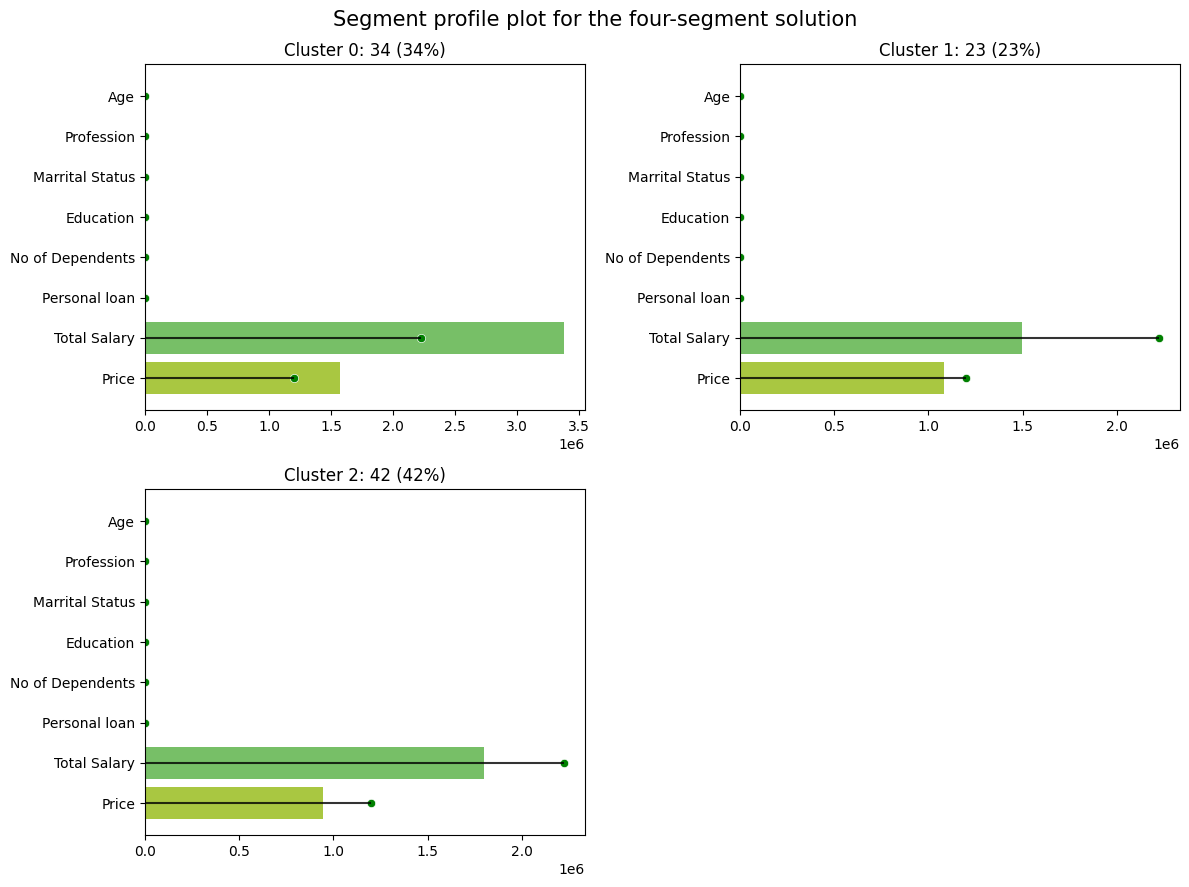

In [176]:
plt.figure(figsize = (12, 9))
for i in range(3): # Changed range from 4 to 3 to match the number of clusters
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'green')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='black', alpha = 0.8)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {df_encoded['Cluster'].value_counts()[i]} ({df_encoded['Cluster'].value_counts()[i]*100/len(df_encoded):.0f}%)")

plt.suptitle("Segment profile plot for the four-segment solution", fontsize = 15)
plt.tight_layout()
plt.show()

**Conclusion from Behavioral Segmentation:**

Based on the K-Means clustering applied to the behavioral data and the resulting segment profile plot, we can gain valuable insights into distinct customer segments:

1.  **Cluster 0:** Looking at the segment profile plot, Cluster 0 appears to represent a segment with relatively **higher average Total Salary and Price** compared to the other clusters and the overall average. They also tend to have a higher average age and a higher number of dependents. This segment might represent established individuals or families with higher income levels and potentially a greater capacity to purchase higher-priced EVs.

2.  **Cluster 1:** Cluster 1 seems to be characterized by having the **lowest average Total Salary and Price**. They also have the lowest average age and the fewest dependents. This segment could represent younger individuals or those with lower income, who are likely interested in more affordable EV options.

3.  **Cluster 2:** Cluster 2 shows a mixed profile. While their average Total Salary is lower than Cluster 0, it's higher than Cluster 1. Their average Price is also in the middle range. This segment has the highest average number of dependents and a higher average age than Cluster 1 but lower than Cluster 0. This segment might represent families with moderate income who are considering EVs, possibly focusing on vehicles that can accommodate more dependents.

**Overall Insights from Clustering:**

The clustering reveals that the behavioral data can be segmented based on key factors such as income (Total Salary), the price of vehicles purchased, age, and the number of dependents. These segments likely represent different customer profiles with varying purchasing power, family needs, and potentially different priorities when considering an electric vehicle.

This information can be highly valuable for targeted marketing strategies, product development, and sales approaches. For example, marketing efforts for higher-priced EVs could be focused on Cluster 0, while more affordable options might be promoted to Cluster 1. Understanding the needs of Cluster 2 (potentially families with moderate income) could inform the development of family-friendly EV models or financing options.